# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [4]:
session = tf.Session()

# Regresión de la distancia ortogonal

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

$$y = mx +n $$
Dado $(x_0,y_0)$, se define la distancia entre el punto y la recta anterior como:
$$d=\frac{|y_0-(mx_0+b)|}{\sqrt{m^2+1}}$$

In [18]:
iris = datasets.load_iris()

In [19]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [43]:
batch_size = 50
learning_rate = 0.1

In [44]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
m = tf.Variable(tf.random_normal(shape=[1,1]))
n = tf.Variable(tf.random_normal(shape=[1,1]))

In [45]:
y_predict = tf.add(tf.matmul(x_data, m), n)

In [46]:
deming_num = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data,m), n)))
demin_den = tf.sqrt(tf.add(tf.square(m), 1.0))
deming_loss = tf.reduce_mean(tf.truediv(deming_num, demin_den))

In [47]:
init = tf.global_variables_initializer()
session.run(init)

In [48]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(deming_loss)

In [49]:
loss_vect = []
for i in range(300):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    temp_loss = session.run(deming_loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    if(i+1)%20==0:
        print("Paso #"+str(i+1)+", m = "+str(session.run(m))+", n = "+str(session.run(n))+
             "Loss: "+str(temp_loss))

Paso #20, m = [[2.5655084]], n = [[1.3551813]]Loss: 0.655898
Paso #40, m = [[2.9702253]], n = [[1.6806308]]Loss: 0.47024342
Paso #60, m = [[3.0164723]], n = [[1.7958388]]Loss: 0.41988862
Paso #80, m = [[2.9753373]], n = [[1.855397]]Loss: 0.45499367
Paso #100, m = [[2.977797]], n = [[1.9473468]]Loss: 0.41593292
Paso #120, m = [[2.891134]], n = [[1.9745002]]Loss: 0.39346603
Paso #140, m = [[2.8595881]], n = [[2.0416582]]Loss: 0.47336754
Paso #160, m = [[2.813157]], n = [[2.1002223]]Loss: 0.42140323
Paso #180, m = [[2.7910624]], n = [[2.1746404]]Loss: 0.42626816
Paso #200, m = [[2.7229323]], n = [[2.2154887]]Loss: 0.37063637
Paso #220, m = [[2.6833353]], n = [[2.2806666]]Loss: 0.37134707
Paso #240, m = [[2.6571546]], n = [[2.3594327]]Loss: 0.3982284
Paso #260, m = [[2.6121037]], n = [[2.4259253]]Loss: 0.38646835
Paso #280, m = [[2.553083]], n = [[2.487557]]Loss: 0.44166252
Paso #300, m = [[2.5112743]], n = [[2.564989]]Loss: 0.34520698


In [50]:
[[slope]] = session.run(m)
[[intercept]] = session.run(n)
print(str(slope)+"x+"+str(intercept))

2.5112743x+2.564989


In [51]:
best_fit = []
for i in x_vals: 
    best_fit.append(slope * i +intercept)

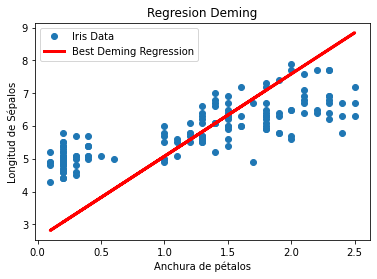

In [52]:
plt.plot(x_vals, y_vals, 'o', label = "Iris Data")
plt.plot(x_vals, best_fit, 'r-', label = "Best Deming Regression", linewidth = 3)
plt.legend(loc = "upper left")
plt.title("Regresion Deming")
plt.xlabel("Anchura de pétalos")
plt.ylabel("Longitud de Sépalos")
plt.show()

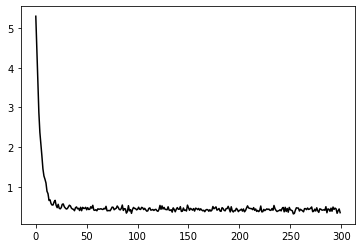

In [53]:
plt.plot(loss_vect, 'k-', label="Función de pérdidas")